## CNN using Keras - MNIST Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [44]:
from tensorflow.keras.datasets import mnist


(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, " ",y_train.shape)

(60000, 28, 28)   (60000,)


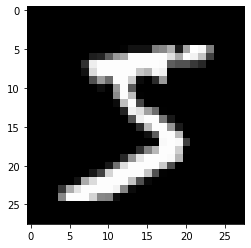

Image Label - 5


In [45]:
image = x_train[0]
plt.imshow(image, cmap="gray")
plt.show()

print("Image Label -",y_train[0])

### One hot Encoding

In [46]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

print("Label ",y_train[0])
print("One hot encoded ",y_cat_train[0])

Label  5
One hot encoded  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Normalizing Data

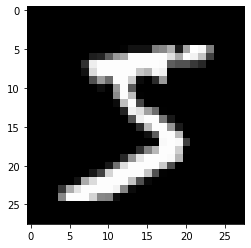

In [47]:
x_train = x_train/255
x_test = x_test/255

plt.imshow(x_train[0], cmap="gray")
plt.show()

### Reshaping

In [48]:
print("Before - ",x_train.shape)

# # dim = (batchsize, x(width), y(height), color_channels)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print("After - ",x_train.shape)

Before -  (60000, 28, 28)
After -  (60000, 28, 28, 1)


#   

## CNN Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

# Output softmax (multiclass classification)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=2,verbose=1)

In [51]:
model.fit(x=x_train, y=y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.1401 - accuracy: 0.9589 - val_loss: 0.0664 - val_accuracy: 0.9781
Epoch 2/10
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 35s 577us/sample - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0444 - val_accuracy: 0.9856
Epoch 4/10
60000/60000 [==============================] - 35s 582us/sample - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 35s 578us/sample - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 6/10
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0449 - val_accuracy: 0.9882
Epoch 00006: early stopping


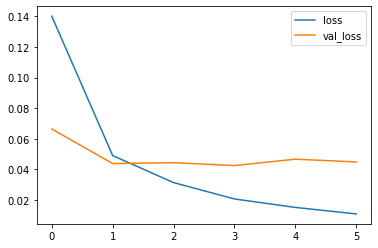

In [54]:
metrics = pd.DataFrame(model.history.history)
metrics[["loss","val_loss"]].plot()

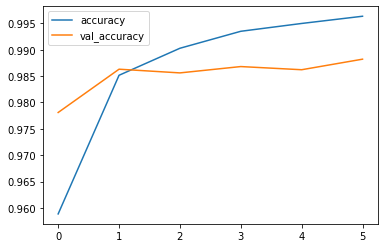

In [55]:
metrics[["accuracy","val_accuracy"]].plot()

### Evaluation

In [57]:
model.metrics_names

['loss', 'accuracy']

In [61]:
results = model.evaluate(x_test, y_cat_test)

print("Loss : ",results[0])
print("Accuracy : ",results[1]*100,"%")

10000/10000 [==============================] - 2s 181us/sample - loss: 0.0449 - accuracy: 0.9882
Loss :  0.04489436517877184
Accuracy :  98.82000088691711 %


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



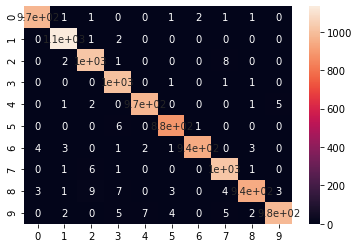

In [78]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True)
plt.show()

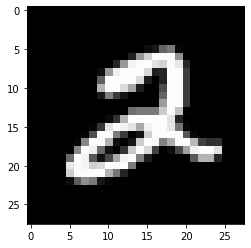

In [87]:
number = x_train[5].reshape(28,28)
plt.imshow(number,cmap="gray")
plt.show()

In [89]:
pre = model.predict_classes(number.reshape(1,28,28,1))
print("Prediction ",pre[0])

Prediction  2
